K-means
=========================

Se fundamenta en el cálculo de los centroides de cada cluster, buscando que los puntos se agrupen según la cercanía que tengan con este. Los pasos del algoritmo son:

1.- Inicialización: se escogen k grupos y se selecciona un punto del conjunto de datos (generalmente es de forma aleatoria).

2.- Asignación de centroides: se asigna a cada elemento su centroide más cercano.

3.- Actualización de centroides: se actualiza el centroide de cada grupo.

4.- Repetir 2 y 3 hasta que los centroides no se muevan o que la distancia al actualizarlos esté por debajo de un umbral.

Nota: la selección del tipo de distancia que se utilice dará lugar a diferentes clusters.

Número K óptimo
=========================

Tal vez te haya surgido la pregunta, ¿y cómo puedo escoger el mejor número de clusters? bueno, como tal no hay un método exacto. La forma más común es con el *método del codo*. Se construye un gráfico con la suma de los cuadrados de la distancia de cada elemento a su centroide, es decir $WCSS = \sum_{k=0}^{K - 1} [ \sum_{i = 0}^{N - 1} d(P_i, C_k)^2]$. Para escoger el número óptimo, de manera visual se elige dónde es que se estabiliza la tendencia de la distancia (que no sea muy rápida, ni muy lenta).

<center>

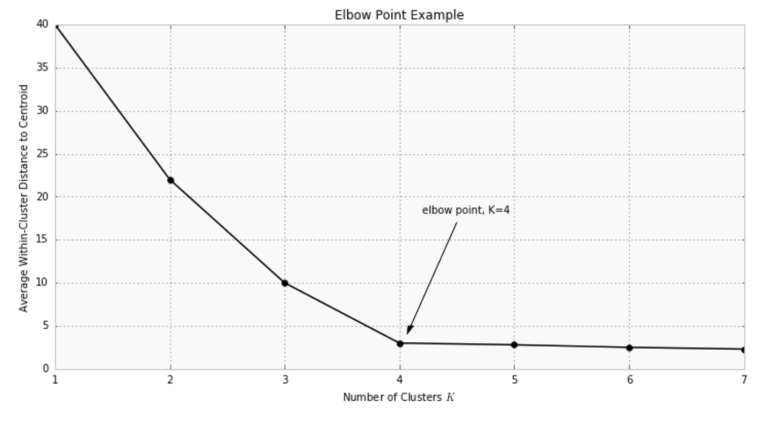

</center>

Implementación
=========================

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importamos el dataset
dataset = pd.read_csv('./datasets/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

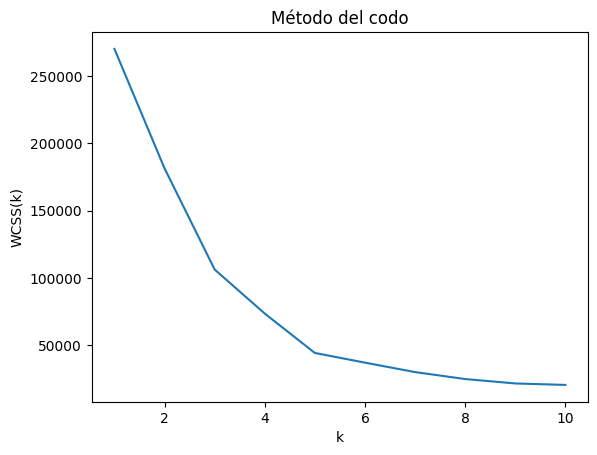

In [3]:
# Método del codo
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    # Usamos el método k-means++ para evitar el problema de la inicialización aleatoria
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Método del codo")
plt.xlabel("k")
plt.ylabel("WCSS(k)")
plt.show()

In [4]:
# Aplicamos k-means con k = 5
kmeans = KMeans(n_clusters = 5, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


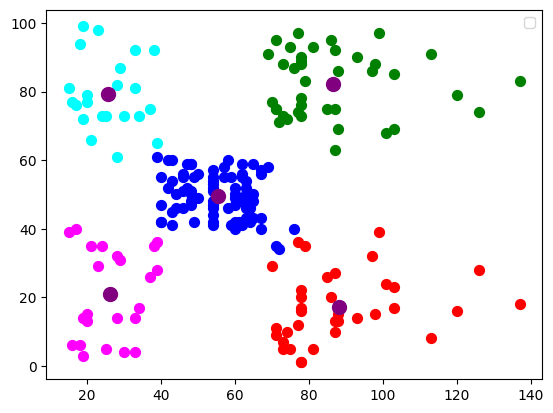

In [5]:
# Visualizamos los clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = "red")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = "blue")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = "green")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = "cyan")
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = "magenta")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = "purple")
plt.legend()
plt.show()

Referencias:

https://machinelearningparatodos.com/segmentacion-utilizando-k-means-en-python/#:~:text=El%20m%C3%A9todo%20del%20codo%20utiliza,intra%2Dcluster%20tiende%20a%20disminuir.

https://www.unioviedo.es/compnum/laboratorios_py/kmeans/kmeans.html